In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Upload data from csv file

gdp = pd.read_csv('all_data.csv')
gdp.rename(columns={'Life expectancy at birth (years)':'Life'}, inplace=True)


In [15]:
print(gdp.head())
print(gdp.info())
print(gdp.Country.unique())
print(gdp.Year.unique())

#After initial inspection of the data frame, we see that it consists of variables from six countries -- Chile, China, Germany, Mexico, USA, and Zimbabwe -- over 16 years, 2000-2015.

#For each year, the data frame contains observations on each country's GDP and life expectancy that year.

#We also see that there are no missing data values (we can deduce this since each column has 16 * 6 = 96 values).

  Country  Year  Life           GDP
0   Chile  2000  77.3  7.786093e+10
1   Chile  2001  77.3  7.097992e+10
2   Chile  2002  77.8  6.973681e+10
3   Chile  2003  77.9  7.564346e+10
4   Chile  2004  78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   Life     96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [16]:
#We split the overall dataframe into six dataframes -- one for each country

Chl = gdp[gdp['Country'] == 'Chile']
Chn = gdp[gdp['Country'] == 'China']
Ger = gdp[gdp['Country'] == 'Germany']
Mex = gdp[gdp['Country'] == 'Mexico']
USA = gdp[gdp['Country'] == 'United States of America']
Zim = gdp[gdp['Country'] == 'Zimbabwe']

In [17]:
#Save each country's GDP and life expectancy from 2000-2015 to its own series

Chl_GDP = gdp.GDP[gdp['Country'] == 'Chile']
Chn_GDP = gdp.GDP[gdp['Country'] == 'China']
Ger_GDP = gdp.GDP[gdp['Country'] == 'Germany']
Mex_GDP = gdp.GDP[gdp['Country'] == 'Mexico']
USA_GDP = gdp.GDP[gdp['Country'] == 'United States of America']
Zim_GDP = gdp.GDP[gdp['Country'] == 'Zimbabwe']

Chl_Life = gdp.Life[gdp['Country'] == 'Chile']
Chn_Life = gdp.Life[gdp['Country'] == 'China']
Ger_Life = gdp.Life[gdp['Country'] == 'Germany']
Mex_Life = gdp.Life[gdp['Country'] == 'Mexico']
USA_Life = gdp.Life[gdp['Country'] == 'United States of America']
Zim_Life = gdp.Life[gdp['Country'] == 'Zimbabwe']


C:\Users\esmos\AppData\Local\Temp/ipykernel_24160/587982169.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['0', '0', '2.5', '5', '7.5', '10', '12.5', '15', '17.5'])


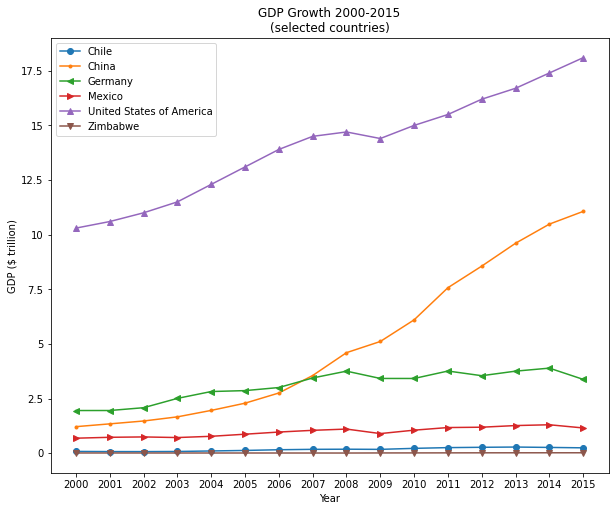

<Figure size 432x288 with 0 Axes>

In [18]:
#Create line graphs showing the six countries' GDP growth and life expectancy over time

Years = range(2000, 2016)

plt.figure(figsize=(10, 8))
plt.plot(Years, Chl_GDP, marker = 'o')
plt.plot(Years, Chn_GDP, marker = '.')
plt.plot(Years, Ger_GDP, marker = '<')
plt.plot(Years, Mex_GDP, marker = '>')
plt.plot(Years, USA_GDP, marker = '^')
plt.plot(Years, Zim_GDP, marker = 'v')
plt.legend(gdp.Country.unique())
plt.ylabel('GDP ($ trillion)')
plt.xlabel('Year')
plt.title('GDP Growth 2000-2015\n(selected countries)')
ax1 = plt.subplot()
ax1.set_xticks(Years)
ax1.set_xticklabels(Years)
ax1.set_yticklabels(['0', '0', '2.5', '5', '7.5', '10', '12.5', '15', '17.5'])
plt.savefig('GDP_by_country.png')
plt.show()
plt.clf()


In [19]:
#We can see that by 2015 the total GDP of the United States and China far outpace the other countries in the data set. 

#Visually, it seems that that the GDP of these two countries also grew much more than the other countries in the timeframe studied.

#The GDP of Chile, Germany, Mexico, and Zimbabwe are not much higher in 2015 than in 2000, while the U.S. GDP almost doubled and the GDP of China grew even more.

#However, applying some simple calculations to our data, we see that this apparent takeaway is in fact false.


In [20]:
print(gdp.GDP[(gdp.Country == 'Chile') & (gdp.Year == 2015)])
print(gdp.GDP[(gdp.Country == 'Chile') & (gdp.Year == 2000)])

diffs_list=[]
ratio_list=[]
countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']

for country in gdp.Country.unique():
    val2015 = int(gdp.GDP[(gdp.Country == country) & (gdp.Year == 2015)])
    val2000 = int(gdp.GDP[(gdp.Country == country) & (gdp.Year == 2000)])
    diff = val2015 - val2000
    diffs_list.append(diff)
    diff_zip = zip(countries, diffs_list)
    ratio = val2015 / val2000
    ratio_list.append(ratio)
    ratio_zip = zip(countries, ratio_list)

print(list(diff_zip))
print(list(ratio_zip))


15    2.425180e+11
Name: GDP, dtype: float64
0    7.786093e+10
Name: GDP, dtype: float64
[('Chile', 164657067848), ('China', 9853350000000), ('Germany', 1425660000000), ('Mexico', 468612000000), ('United States of America', 7800000000000), ('Zimbabwe', 9614710207)]
[('Chile', 3.1147584969385766), ('China', 9.134189127832583), ('Germany', 1.7311264391394652), ('Mexico', 1.6854580134806216), ('United States of America', 1.7572815533980584), ('Zimbabwe', 2.4371855222221437)]


In [21]:
print(sorted(diffs_list))

[9614710207, 164657067848, 468612000000, 1425660000000, 7800000000000, 9853350000000]


In [22]:
#Examining our data numerically, we see that the highest ratio of 2015 GDP to 2000 GDP belongs to China, followed by Chile, Zimbabwe, and then the United States. Since Chile and Zimbabwe started with such small levels of GDP relative to the U.S., their growth rate between 2000-2015 is in fact larger than that of the U.S.

#When we look at absolute GDP levels rather than growth rates, we see that China and the United States indeed have the two highest amounts of growth between 2000 and 2015 -- 9.9 trillion and 7.8 trillion dollars, respectively.

#The main takeaways remain: the GDP of China and the United States are much larger than the other countries studied.


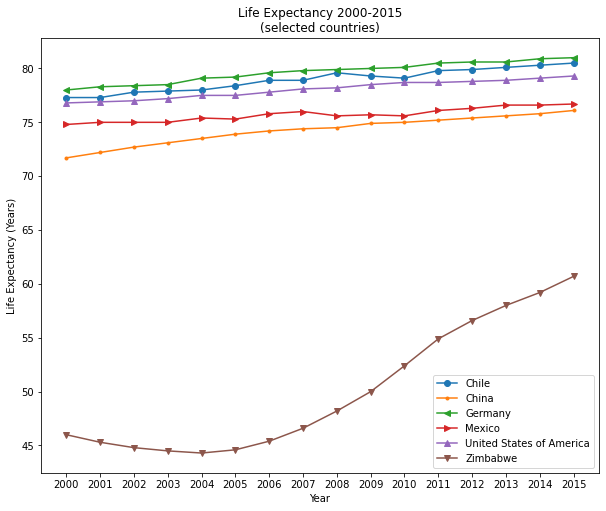

<Figure size 432x288 with 0 Axes>

In [23]:
#Now we plot life expectancy vs. years for all countries in our data set.

plt.figure(figsize=(10, 8))
plt.plot(Years, Chl_Life, marker = 'o')
plt.plot(Years, Chn_Life, marker = '.')
plt.plot(Years, Ger_Life, marker = '<')
plt.plot(Years, Mex_Life, marker = '>')
plt.plot(Years, USA_Life, marker = '^')
plt.plot(Years, Zim_Life, marker = 'v')
plt.legend(gdp.Country.unique())
plt.ylabel('Life Expectancy (Years)')
plt.xlabel('Year')
plt.title('Life Expectancy 2000-2015\n(selected countries)')
ax1 = plt.subplot()
ax1.set_xticks(Years)
ax1.set_xticklabels(Years)
plt.show()
plt.clf()

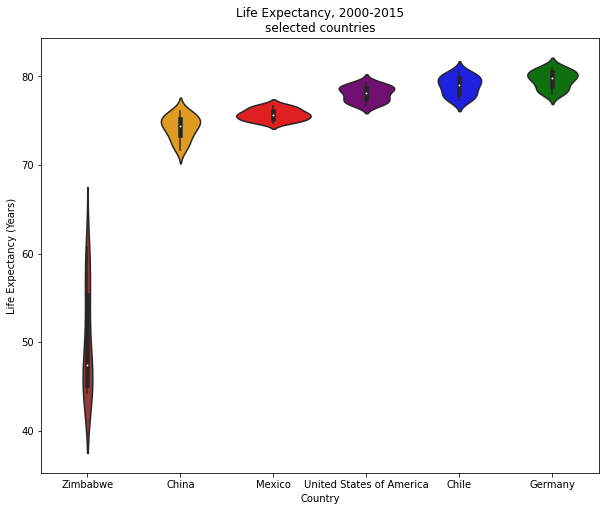

<Figure size 432x288 with 0 Axes>

In [52]:
#A better way to view the data country vs. country may be a violin plot, which we will create now.

pal = {'Zimbabwe':'brown', 'China':'orange', 'Mexico':'red', 'United States of America':'purple', 'Chile':'blue', 'Germany':'green'}
plt.figure(figsize=(10, 8))
sns.violinplot(x='Country', y='Life', data=gdp, order=['Zimbabwe', 'China', 'Mexico', 'United States of America', 'Chile', 'Germany'], palette=pal)
plt.ylabel('Life Expectancy (Years)')
plt.title('Life Expectancy, 2000-2015\nselected countries')
plt.savefig('Life_exp_by_country.png')
plt.show()
plt.clf()

C:\Users\esmos\AppData\Local\Temp/ipykernel_24160/3988979423.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['0', '0', '2.5', '5', '7.5', '10', '12.5', '15', '17.5'])


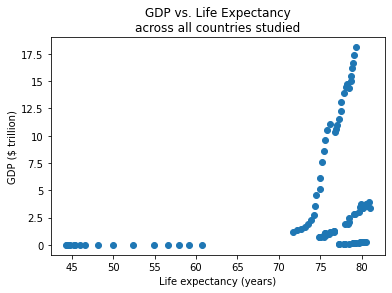

<Figure size 432x288 with 0 Axes>

In [25]:
plt.scatter(x='Life', y='GDP', data=gdp)
plt.title('GDP vs. Life Expectancy\nacross all countries studied')
plt.xlabel('Life expectancy (years)')
plt.ylabel('GDP ($ trillion)')
ax2 = plt.subplot()
ax2.set_yticklabels(['0', '0', '2.5', '5', '7.5', '10', '12.5', '15', '17.5'])
plt.show()
plt.clf()


In [26]:
#Creating a scatterplot of data across the six countries reveals very little. We can see a general positive trend between life expectancy over 70 and GDP levels. However, the points at the bottom left tell us very little.

#We will examine each country's data individually to explore the relationship between life expectancy and GDP.


#To add lines to the scatter plots we will create linear regression models for each country.

In [32]:
reg_chile = sm.OLS.from_formula('Life ~ GDP', data=Chl).fit()
reg_china = sm.OLS.from_formula('Life ~ GDP', data=Chn).fit()
reg_germany = sm.OLS.from_formula('Life ~ GDP', data=Ger).fit()
reg_mexico = sm.OLS.from_formula('Life ~ GDP', data=Mex).fit()
reg_USA = sm.OLS.from_formula('Life ~ GDP', data=USA).fit()
reg_zim = sm.OLS.from_formula('Life ~ GDP', data=Zim).fit()

line_chile = reg_chile.params[0] + reg_chile.params[1] * Chl.GDP
line_china = reg_china.params[0] + reg_china.params[1] * Chn.GDP
line_germany = reg_germany.params[0] + reg_germany.params[1] * Ger.GDP
line_mexico = reg_mexico.params[0] + reg_mexico.params[1] * Mex.GDP
line_USA = reg_USA.params[0] + reg_USA.params[1] * USA.GDP
line_zim = reg_zim.params[0] + reg_zim.params[1] * Zim.GDP


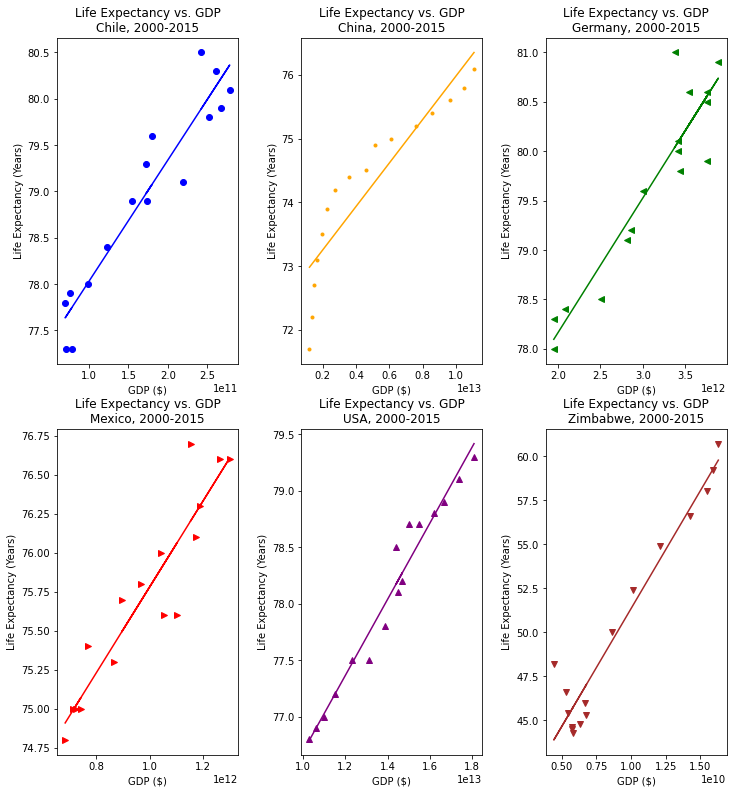

<Figure size 432x288 with 0 Axes>

In [54]:


plt.figure(figsize=(12, 12))
plt.subplot(2, 3, 1)
plt.plot(gdp.GDP[gdp.Country == 'Chile'], gdp.Life[gdp.Country == 'Chile'], 'o', color='blue')
plt.plot(Chl.GDP, line_chile, color='blue')
plt.title('Life Expectancy vs. GDP\nChile, 2000-2015')
plt.xlabel('GDP ($)')
plt.ylabel('Life Expectancy (Years)')

plt.subplot(2, 3, 2)
plt.plot(gdp.GDP[gdp.Country == 'China'], gdp.Life[gdp.Country == 'China'], '.', color='orange')
plt.plot(Chn.GDP, line_china, color = 'orange')
plt.title('Life Expectancy vs. GDP\nChina, 2000-2015')
plt.xlabel('GDP ($)')
plt.ylabel('Life Expectancy (Years)')

plt.subplot(2, 3, 3)
plt.plot(gdp.GDP[gdp.Country == 'Germany'], gdp.Life[gdp.Country == 'Germany'], '<', color='green')
plt.plot(Ger.GDP, line_germany, color = 'green')
plt.title('Life Expectancy vs. GDP\nGermany, 2000-2015')
plt.xlabel('GDP ($)')
plt.ylabel('Life Expectancy (Years)')

plt.subplot(2, 3, 4)
plt.plot(gdp.GDP[gdp.Country == 'Mexico'], gdp.Life[gdp.Country == 'Mexico'], '>', color='red')
plt.plot(Mex.GDP, line_mexico, color = 'red')
plt.title('Life Expectancy vs. GDP\nMexico, 2000-2015')
plt.xlabel('GDP ($)')
plt.ylabel('Life Expectancy (Years)')

plt.subplot(2, 3, 5)
plt.plot(gdp.GDP[gdp.Country == 'United States of America'], gdp.Life[gdp.Country == 'United States of America'], '^', color='purple')
plt.plot(USA.GDP, line_USA, color = 'purple')
plt.title('Life Expectancy vs. GDP\nUSA, 2000-2015')
plt.xlabel('GDP ($)')
plt.ylabel('Life Expectancy (Years)')

plt.subplot(2, 3, 6)
plt.plot(gdp.GDP[gdp.Country == 'Zimbabwe'], gdp.Life[gdp.Country == 'Zimbabwe'], 'v', color='brown')
plt.plot(Zim.GDP, line_zim, color = 'brown')
plt.title('Life Expectancy vs. GDP\nZimbabwe, 2000-2015')
plt.xlabel('GDP ($)')
plt.ylabel('Life Expectancy (Years)')

plt.subplots_adjust(wspace=0.35)
plt.subplots_adjust(bottom=0.05)
plt.savefig('Life_exp_vs_GDP.png')
plt.show()
plt.clf()

In [55]:
print(reg_chile.summary())


                            OLS Regression Results                            
Dep. Variable:                   Life   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     129.2
Date:                Thu, 23 Jun 2022   Prob (F-statistic):           1.87e-08
Time:                        13:12:43   Log-Likelihood:                -4.4985
No. Observations:                  16   AIC:                             13.00
Df Residuals:                      14   BIC:                             14.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     76.7223      0.213    359.604      0.0

C:\Users\esmos\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [56]:
print(reg_china.summary())


                            OLS Regression Results                            
Dep. Variable:                   Life   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     66.19
Date:                Thu, 23 Jun 2022   Prob (F-statistic):           1.13e-06
Time:                        13:12:57   Log-Likelihood:                -12.642
No. Observations:                  16   AIC:                             29.28
Df Residuals:                      14   BIC:                             30.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.5669      0.252    287.416      0.0

C:\Users\esmos\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [57]:
print(reg_germany.summary())


                            OLS Regression Results                            
Dep. Variable:                   Life   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     93.63
Date:                Thu, 23 Jun 2022   Prob (F-statistic):           1.40e-07
Time:                        13:13:48   Log-Likelihood:                -5.4643
No. Observations:                  16   AIC:                             14.93
Df Residuals:                      14   BIC:                             16.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.4399      0.445    169.477      0.0

C:\Users\esmos\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [58]:
print(reg_mexico.summary())


                            OLS Regression Results                            
Dep. Variable:                   Life   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     92.93
Date:                Thu, 23 Jun 2022   Prob (F-statistic):           1.47e-07
Time:                        13:13:57   Log-Likelihood:                 1.7010
No. Observations:                  16   AIC:                            0.5980
Df Residuals:                      14   BIC:                             2.143
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.0209      0.286    255.459      0.0

C:\Users\esmos\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [60]:
print(reg_USA.summary())


                            OLS Regression Results                            
Dep. Variable:                   Life   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     372.2
Date:                Thu, 23 Jun 2022   Prob (F-statistic):           1.75e-11
Time:                        13:14:11   Log-Likelihood:                 7.2844
No. Observations:                  16   AIC:                            -10.57
Df Residuals:                      14   BIC:                            -9.024
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.3336      0.249    295.089      0.0

C:\Users\esmos\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [61]:
print(reg_zim.summary())


                            OLS Regression Results                            
Dep. Variable:                   Life   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     196.7
Date:                Thu, 23 Jun 2022   Prob (F-statistic):           1.24e-09
Time:                        13:14:24   Log-Likelihood:                -29.005
No. Observations:                  16   AIC:                             62.01
Df Residuals:                      14   BIC:                             63.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.9925      0.950     40.010      0.0

C:\Users\esmos\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
